# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

given x, find 
$\hat{y} = p(y=1 | x)$  

where 
$0 \leq \hat{y} \leq 1$  and $x \in R^{n_x}$

Parameters : $w \in R^{n_x}$, $b \in R$

Output : $\hat{y} = \sigma(w^T x + b)$


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns 

In [2]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

## Cost Function

### The cross-entropy loss function
We need a loss function that expresses, for an observationx, how close the classifier output 

$\hat{y} = σ(w^T x+b)$
        
is to the correct output (y, which is 0 or 1). We’ll call this:

$L(\hat{y},y)$ = How much $\hat{y}$ differs from the true $y$ 
        
We do this via a loss function that prefers the correct class labels of the training examples to bemore likely.  This is called conditional maximum likelihood estimation:  we choose the parametersw,b thatmaximize the log probability ofthe true y labels in the training datagiven the observations x.  The resulting loss function is the negative log likelihood loss, generally called the cross-entropy loss.

$J(\theta)=\frac{1}{m} {\sum_{i=0}^{m}cost(h_{\theta}(x^{(i)}),y^{(i)})}$

for non linear paramter there can be many local minima

$cost(h_{\theta}(x), y) =
\begin{cases}
    -\log(h_{\theta}(x)) & \text{if } y=1\\
    -\log(1 - h_{\theta}(x)) & \text{if } y=0
\end{cases}$

$cost(h_{\theta}(x), y) = -y \log(h_{\theta}(x)) - (1 - y)\log(1 - h_{\theta}(x))$

$J(\theta) = -\frac{1}{m}{\sum_{i=0}^{m} \big[ y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \big] }$

MAXIMUM LIKELIHOOD ESTIMATION

In [3]:
def calculate_entropy_cost(y_pred,y):
    m = y_pred.shape[0]
    part_1 = y * np.log(y_pred)
    
    part_2 = (1 - y) * np.log(1 - y_pred) 
    
    cost = ( -1 / m ) * np.sum(part_1 + part_2)   
    return cost

## Sigmoid Function


$\sigma(z)= \frac{1}{1 + e^{-z}}$



if z is positive large $\sigma(z) \approx \frac{1}{1 + 0} \approx 1$

if z is negative large $\sigma(x) = \frac{1}{1 + e^{-z}} \approx 0$ here $e^{-z}$ is a very big number

<hr/>
in case of hypothesis
$h_{\theta}(x) = \frac{1}{1 + e^{- \theta^T x}}$

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

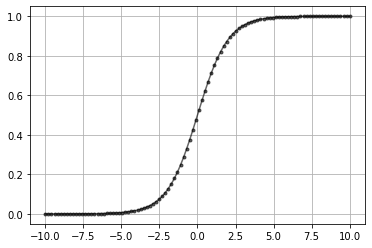

In [5]:
data = np.linspace(-10,10,100)
plt.plot(data, sigmoid(data),'k.-',alpha=0.6)
plt.grid()

## Gradient Descent Algorithm


minimize $J(\theta) \rightarrow$ get new theta $\theta \rightarrow$ calculate $h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}} \rightarrow$ minimize $J(\theta)$

\begin{align}
    \text{repeat until convergence \{}\\
    \theta_j &:= \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)\\
    \text{\}}\\
\end{align}

$\frac {\partial}{\partial\theta_j} \bigg[-\frac{1}{m}{\sum_{i=0}^{m} \big[ y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \big]} \bigg]$

### Math for Gradient Descent

\begin{align}
    L &= -\frac{1}{m}{\sum_{i=1}^{m} \big[ y^{(i)} \log\hat{y} - (1 - y^{(i)}) \log(1 - \hat{y} ) \big]}\\
    \hat{y} &= \frac{1}{1 + e^{- h_{\theta}(x)}}\\
    h_{\theta}(x) &= \theta^T x\\
    \\
    \hat{y} & \text{ depends on } \theta\\
    y & \text{ doesn't depend on } \theta
\end{align}

task is to calculate 

$\frac{\partial L }{\partial \theta} = -\frac{1}{m} \frac{\partial}{\partial \theta} \big( y \log{\hat{y}} + (1 - y) \log{(1 - \hat{y})}  \big)$

\begin{align}
    \frac{\partial \hat{y}}{\partial \theta}  &= \frac{\partial}{\partial \theta} \big( \frac{1}{1 + e^{-h_{\theta}(x)}} \big)\\
                                              &= - \frac{1}{(1 + e^{-h_{\theta}(x)})^2} \frac{\partial}{\partial \theta} (1 + e^{-h_{\theta}(x)})\\
                                              &= \frac{e^{-h_{\theta}(x)} x}{(1 + e^{-h_{\theta}(x)})^2}\\
                                              &= \hat{y}^2 e^{-h_{\theta}(x)} x
    \\
    \\
    \frac{\partial L }{\partial \theta} =& -\frac{1}{m} \frac{\partial}{\partial \theta} \big( y \log{\hat{y}} + (1 - y) \log{(1 - \hat{y})}  \big)\\
                                        =& -\frac{1}{m} \bigg[ \frac{\partial}{\partial \theta} ( y \log{\hat{y}}) + \frac{\partial}{\partial \theta}((1 - y) \log{(1 - \hat{y})}) \bigg]\\
                                        =& -\frac{1}{m} \bigg[ \frac{y}{\hat{y}} \frac{\partial}{\partial \theta} \hat{y} + \frac{(1 - y)}{(1 - \hat{y})} \frac{\partial}{\partial \theta}(1 - \hat{y}) \bigg]\\
                                        =& -\frac{1}{m} \bigg[ \frac{y}{\hat{y}} \frac{\partial}{\partial \theta} \hat{y} - \frac{(1 - y)}{(1 - \hat{y})} \frac{\partial}{\partial \theta} \hat{y} \bigg]\\
                                        =& -\frac{1}{m} \bigg[ \frac{y}{\hat{y}} \hat{y}^2 e^{-h_{\theta}(x)} x - \frac{(1 - y)}{(1 - \hat{y})} \hat{y}^2 e^{-h_{\theta}(x)} x \bigg]\\
    \\
    \\
    1 - \hat{y} &= 1 - \frac{1}{1 + e^{-h_{\theta}(x)}}\\
                &= \frac{1 + e^{-h_{\theta}(x)} - 1}{1 + e^{-h_{\theta}(x)}}\\
                &= \hat{y} e^{-h_{\theta}(x)}\\
    \\          
    \\
    \frac{\partial L }{\partial \theta} =& -\frac{1}{m} \bigg[ \frac{y}{\hat{y}} \hat{y}^2 e^{-h_{\theta}(x)} x - \frac{(1 - y)}{\hat{y} e^{-h_{\theta}(x)}} \hat{y}^2 e^{-h_{\theta}(x)} x \bigg]\\
                                        =& -\frac{1}{m} \bigg[ \frac{y}{\hat{y}} \hat{y}^2 e^{-h_{\theta}(x)} x - \frac{(1 - y)}{\hat{y} e^{-h_{\theta}(x)}} \hat{y}^2 e^{-h_{\theta}(x)} x \bigg]\\
                                        =& -\frac{1}{m} \bigg[ y \hat{y} e^{-h_{\theta}(x)} x - (1 - y)\hat{y} x \bigg]\\
                                        =& -\frac{1}{m} \bigg[ y \hat{y} e^{-h_{\theta}(x)} x - \hat{y} x + y\hat{y} x \bigg]\\
                                        =& -\frac{1}{m} \bigg[ y \hat{y} e^{-h_{\theta}(x)} - \hat{y} + y\hat{y} \bigg]x\\
                                        =& -\frac{1}{m} \bigg[ y \hat{y}(1 + e^{-h_{\theta}(x)}) - \hat{y} \bigg]x\\
    \frac{\partial L }{\partial \theta} =& -\frac{1}{m} \bigg[ y - \hat{y} \bigg]x\\
\end{align}

In [6]:
class LogisticRegression:
    def __init__(self,alpha = 0.01 ,iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self._theta = None
        self._X = None
        self._y = None
        self._theta_history = None
        self._cost_history = None
    
    def _format_X_for_theta_0(self,X_i):
        
        X_i = X_i.copy()
        if len(X_i.shape) == 1:
            X_i = X_i.reshape(-1,1)
            
        if False in (X_i[...,0] == 1):        
            return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
        else:
            return X_i
    
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y
    
    @property
    def theta(self):
        return self._theta
    
    @property
    def theta_history(self):
        return self._theta_history
    
    @property
    def cost_history(self):
        return self._cost_history
    
    def predict(self,X):
        format_X = self._format_X_for_theta_0(X)
        
        if format_X.shape[1] == self._theta.shape[0]:
            y_pred = sigmoid(format_X @ self._theta) # (m,1) = (m,n) * (n,1)
            return y_pred
        elif format_X.shape[1] == self._theta.shape[1]:
            y_pred = sigmoid(format_X @ self._theta.T) # (m,1) = (m,n) * (n,1)
            return y_pred
        else:
            raise ValueError("Shape is not proper.")
            
    
    def train(self, X, y, verbose=True, method="BGD", theta_precision = 0.001, batch_size=30, regularization=False, penalty=1.0):
        
        self._X = self._format_X_for_theta_0(X)
        self._y = y

        # number of features+1 because of theta_0
        self._n = self._X.shape[1]
        self._m = self._y.shape[0]

        self._theta_history = []
        self._cost_history = []

        if method == "BGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                # calculate y_pred 
                y_pred = self.predict(self._X)
                
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                
                if regularization:
                    gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                    new_theta_0 = self._theta[:,[0]] - (self.alpha *  gradient[0])
                    new_theta_rest = self._theta[:,range(1,self._n)] * (1 - (( self.alpha * penalty)/self._m) ) - (self.alpha *  gradient[1:])
                    new_theta = np.hstack((new_theta_0,new_theta_rest))
                    
                else:
                    gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                    new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_entropy_cost(y_pred = self.predict(X=self._X), y = self._y)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "SGD": # stochastic gradient descent
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                
                # creating indices for batches
                indices = np.random.randint(0,self._m,size=batch_size)
                
                # creating batch for this iteration
                X_batch = np.take(self._X,indices,axis=0)
                y_batch = np.take(self._y,indices,axis=0)
                
                # calculate y_pred 
                y_pred = self.predict(X_batch)
                # new θ to replace old θ
                new_theta = None
                
                # simultaneous operation 
                if regularization:
                    gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                    new_theta_0 = self._theta[:,[0]] - (self.alpha *  gradient[0])
                    new_theta_rest = self._theta[:,range(1,self._n)] * (1 - (( self.alpha * penalty)/self._m) ) - (self.alpha *  gradient[1:])
                    new_theta = np.hstack((new_theta_0,new_theta_rest))
                    
                    
                else:
                    gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                    new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_entropy_cost(y_pred = self.predict(X=X_batch), y = y_batch)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
            
        else:
            print("No Method Defined.")
      
    

In [7]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=500,n_features=4)
y = y.reshape(-1,1)
X.shape, y.shape

((500, 4), (500, 1))

In [8]:
df = pd.DataFrame(X)
df['y'] = y
df.head()

,0,1,2,3,y
0,-1.394862,1.068507,-1.687573,-1.411072,0
1,0.317359,1.075521,0.914416,-1.940417,0
2,-1.540031,1.312455,-1.809805,-1.785586,0
3,-0.802099,1.197226,-0.735972,-1.810919,0
4,-0.235792,-0.109292,-0.401901,0.258678,0


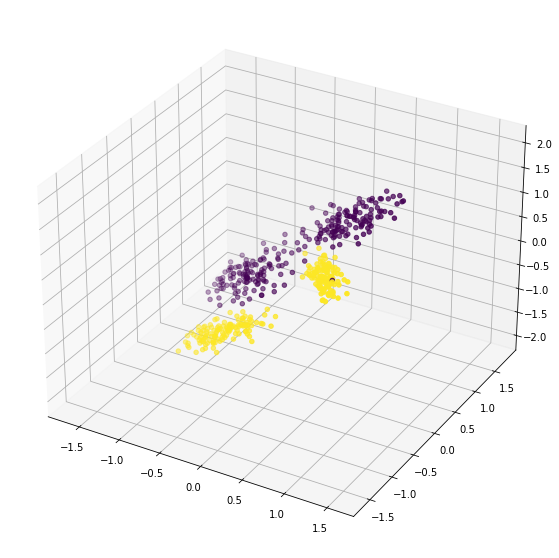

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(X[...,0],X[...,1],X[...,2],c=y)

plt.show()

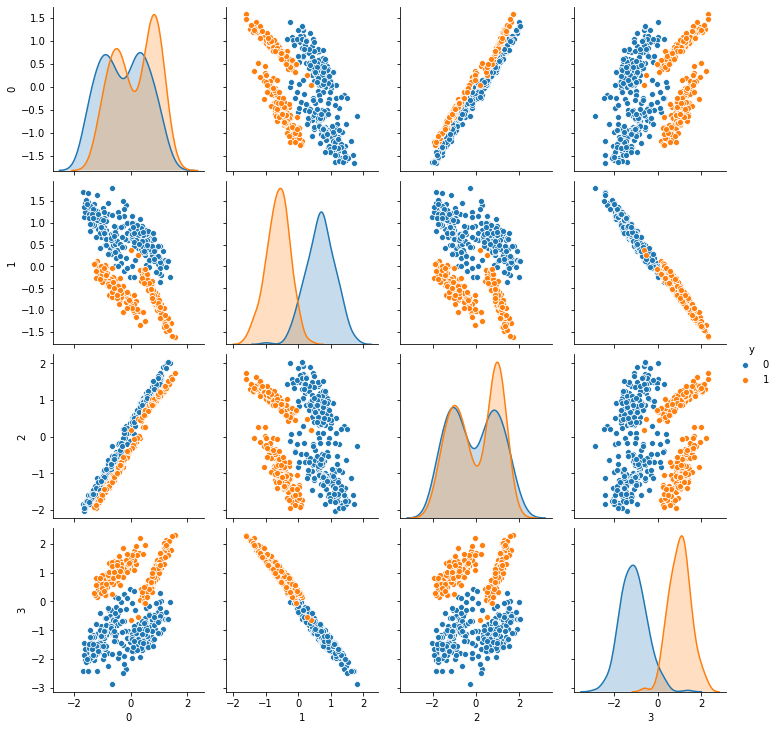

In [10]:
sns.pairplot(df,hue='y')

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score

## Logitsic Regression without Regularization

### Batch Gradient Descent

Fit theta : [[-0.21130795  0.16250085 -2.23739897 -0.65426128  3.7890939 ]]

Confusion Matrix : 
[[243   9]
 [  6 242]]
Accuracy Score   : 
0.97



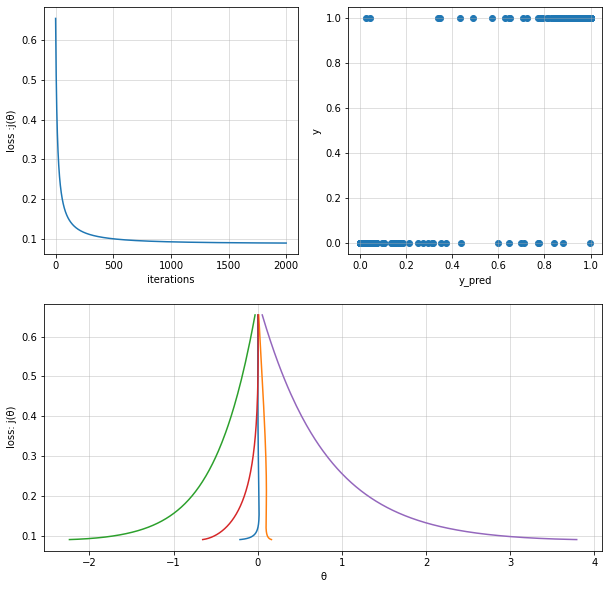

In [31]:
logisitc_reg_model1 = LogisticRegression(alpha=0.1, iterations=2000)
logisitc_reg_model1.train(X=X, y=y, method="BGD", verbose=False)

y_pred = logisitc_reg_model1.predict(X)
theta = logisitc_reg_model1.theta
theta_history = logisitc_reg_model1.theta_history
cost_history = logisitc_reg_model1.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

### Stochastic Gradient Descent

Fit theta : [[-0.2082787   0.17501482 -2.23356835 -0.63291115  3.77958104]]

Confusion Matrix : 
[[243   9]
 [  6 242]]
Accuracy Score   : 
0.97



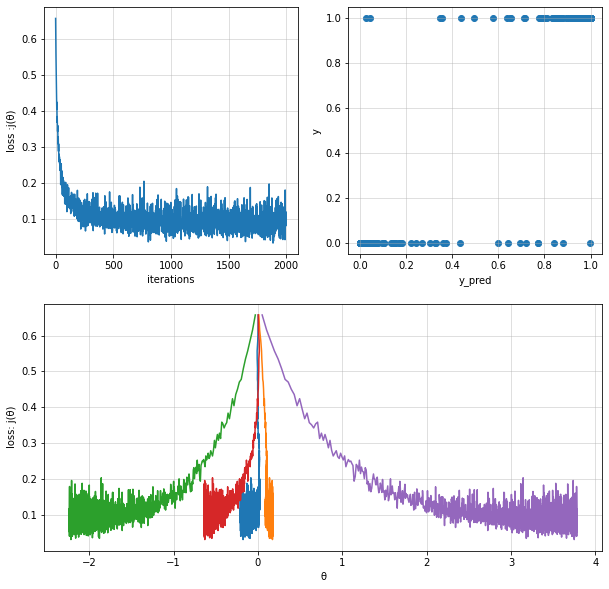

In [22]:
logisitc_reg_model2 = LogisticRegression(alpha=0.1, iterations=2000)
logisitc_reg_model2.train(X=X, y=y, method="SGD",batch_size=200, verbose=False)

y_pred = logisitc_reg_model2.predict(X)
theta = logisitc_reg_model2.theta
theta_history = logisitc_reg_model2.theta_history
cost_history = logisitc_reg_model2.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

## Logistic Regression with Regularization

<img src='images/logistic_reg8.png' width=500 />

- Addressing Overfitting
    - Reduce features
        - manually select
        - model selection algorithm
    - Regularization
        - Keep all the features but reduce magnitude/values of parameter theta
        - Works well when we have a lot of features and each contributes a bit to predicting y

\begin{align}
    \text{repeat until convergence \{}\\
    \theta_0 &:= \theta_0 - \alpha \frac{1}{m} {\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_0^{(i)}}\\
    \theta_j &:= \theta_j - \alpha \big[ \frac{1}{m} {\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}} + \frac{\lambda}{m} {\theta_j} \big]\\
    \text{\}}\\
\end{align}


### Stochastic Gradient Descent

Fit theta : [[-0.17386854  0.13890258 -1.98945975 -0.58958285  3.37052331]]

Confusion Matrix : 
[[243   9]
 [  6 242]]
Accuracy Score   : 
0.97



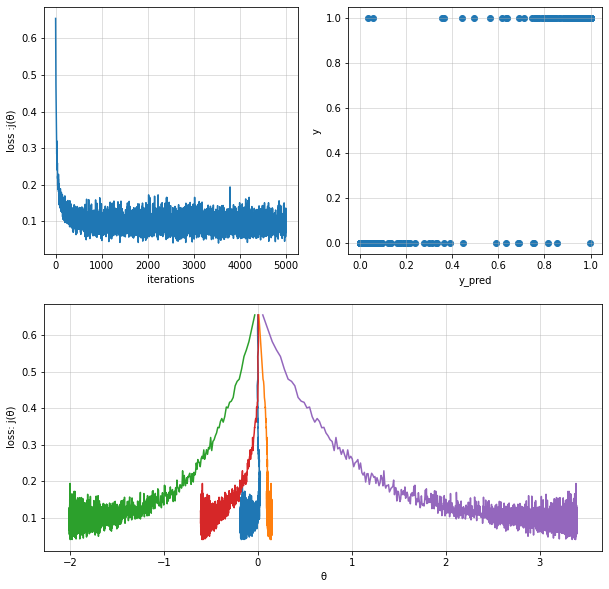

In [29]:
logisitc_reg_model3 = LogisticRegression(alpha=0.1, iterations=5000)
logisitc_reg_model3.train(X=X, y=y, method="SGD",batch_size=300,regularization=True,penalty=1.0, verbose=False)

y_pred = logisitc_reg_model3.predict(X)
theta = logisitc_reg_model3.theta
theta_history = logisitc_reg_model3.theta_history
cost_history = logisitc_reg_model3.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

### Batch Gradient Descent

Fit theta : [[-0.10691344  0.11932182 -1.76102026 -0.52738503  2.98468473]]

Confusion Matrix : 
[[243   9]
 [  5 243]]
Accuracy Score   : 
0.972



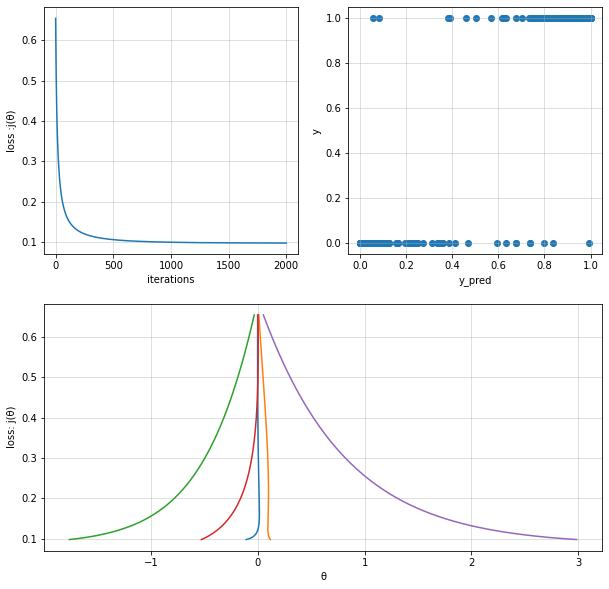

In [24]:
logisitc_reg_model4 = LogisticRegression(alpha=0.1, iterations=2000)
logisitc_reg_model4.train(X=X, y=y, method="BGD", regularization=True, penalty=2.0, verbose=False)

y_pred = logisitc_reg_model4.predict(X)
theta = logisitc_reg_model4.theta
theta_history = logisitc_reg_model4.theta_history
cost_history = logisitc_reg_model4.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()